In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv(r'C:\Users\REBIRTH JEREMYELEVEN\Desktop\1.04.+Real-life+example.csv')

In [29]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# DATA CLEANING

In [30]:


data1 = data.drop(['Model'],axis=1)
data1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [31]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [32]:
data2 = data1.dropna(axis=0)

In [33]:
data2.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

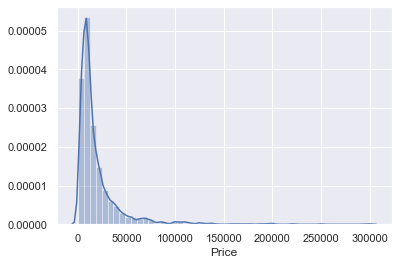

In [34]:
sns.distplot(data2['Price'])

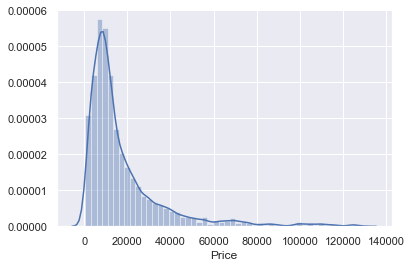

In [35]:
quan = data2['Price'].quantile(0.99)

data3 = data2[data2['Price'] < quan]
sns.distplot(data3['Price'])

In [36]:
data3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


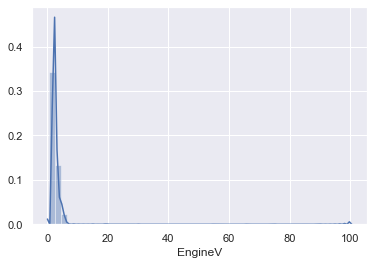

In [37]:
sns.distplot(data3['EngineV'])

In [38]:
data4 = data3[data3['EngineV']<6.5]

In [39]:
q = data4['Mileage'].quantile(0.99)
data5 = data4[data4['Mileage']<q]

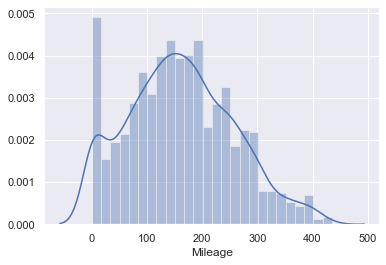

In [40]:
sns.distplot(data5['Mileage'])

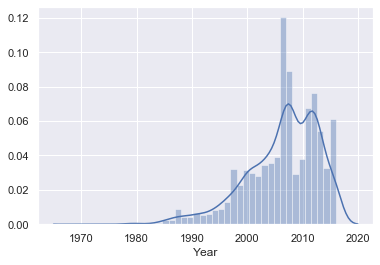

In [41]:
sns.distplot(data5['Year'])

In [42]:
q1 = data5['Year'].quantile(0.01)

data6 = data5[data5['Year']>q1]

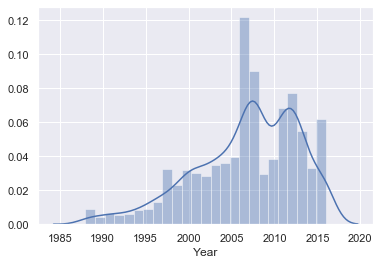

In [43]:
sns.distplot(data6['Year'])

In [44]:
dc = data6.reset_index(drop=True)

In [45]:
log_price = np.log(dc['Price'])

dc['Log_Price'] = log_price

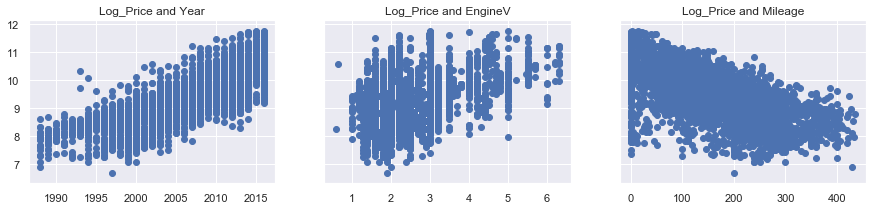

In [46]:
g, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(dc['Year'],dc['Log_Price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(dc['EngineV'], dc['Log_Price'] )
ax2.set_title('Log_Price and EngineV')
ax3.scatter(dc['Mileage'], dc['Log_Price'])
ax3.set_title('Log_Price and Mileage')

plt.show()

In [47]:
variables.head()
variables.shape

(3867, 3)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vi = variance_inflation_factor

In [49]:
variables = dc[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [vi(variables.values, i) for i in range(variables.shape[1])]

vif['Feature'] = variables.columns

array([[2.770e+02, 1.991e+03, 2.000e+00],
       [4.270e+02, 1.999e+03, 2.900e+00],
       [3.580e+02, 2.003e+03, 5.000e+00],
       ...,
       [9.000e+00, 2.014e+03, 3.000e+00],
       [1.000e+00, 1.999e+03, 3.500e+00],
       [1.240e+02, 2.013e+03, 2.000e+00]])

In [51]:
data7 = dc.drop(['Year'],axis=1)


In [52]:
data8 = data7.drop(['Price'],axis=1)

In [53]:
data8.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [54]:
d_wd = pd.get_dummies(data8, drop_first=True)

In [55]:
d_wd.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [56]:
d_wd.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [57]:
cols = ['Log_Price', 'EngineV', 'Mileage', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [1]:
dfinal = d_wd[cols]

NameError: name 'd_wd' is not defined

In [59]:
dep_var = dfinal['Log_Price']
indep_var = dfinal.drop(['Log_Price'], axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(indep_var)
scaler.transform(indep_var)

array([[-0.47452478,  1.2179077 ,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 0.47359854,  2.78660201, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.68588629,  2.06500263, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [ 0.57894557, -1.58482613, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 1.10568075, -1.66848982,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.47452478, -0.38216049, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(indep_var, dep_var, test_size = 0.2, random_state = 365)

In [63]:
reg = LinearRegression()

In [64]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
yhat = reg.predict(x_train)

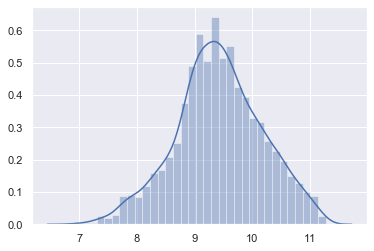

In [66]:
sns.distplot(yhat)

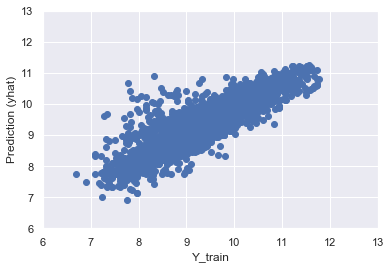

In [67]:
plt.scatter(y_train, yhat)
plt.xlabel('Y_train')
plt.ylabel('Prediction (yhat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

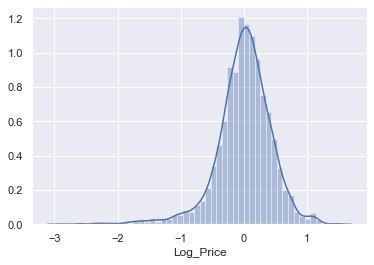

In [68]:
sns.distplot(y_train-yhat)

In [69]:
reg.score(x_train,y_train)

0.744996578792662

In [70]:
reg.intercept_

9.304582140750998

In [71]:
reg.coef_

array([ 0.220212  , -0.00469263,  0.03873566,  0.0324979 , -0.52381377,
       -0.57111309, -0.18076831, -0.2173311 , -0.5882892 , -0.34486661,
       -0.41347478, -0.44050048, -0.46254013, -0.34320264, -0.21126668,
       -0.30601747,  1.1001902 ])

In [72]:
reg_summary = pd.DataFrame(indep_var.columns.values, columns = ['Features'])
reg_summary['Weights'] = (reg.coef_)
reg_summary

,Features,Weights
0,EngineV,0.220212
1,Mileage,-0.004693
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


In [73]:
yhat_test = reg.predict(x_test)

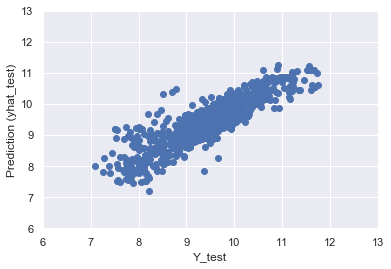

In [74]:
plt.scatter(y_test, yhat_test)
plt.xlabel('Y_test')
plt.ylabel('Prediction (yhat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [75]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' % x)

y_test = y_test.reset_index(drop=True)

d_perf = pd.DataFrame(np.exp(yhat_test), columns=['Predictions'])
d_perf['Targets'] = np.exp(y_test)
d_perf['Error'] = (d_perf['Targets'] - d_perf['Predictions'])
d_perf['%Error'] = np.absolute((d_perf['Error']/d_perf['Targets'])*100)

In [76]:
d_perf.sort_values(by=['%Error'])


,Predictions,Targets,Error,%Error
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
